# Contraceptive Use in Indonesia: 1987 Study #

## Source: UCI Machine Learning Repository ##
### URL: [WebLink](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice)


Source:

** Origin: **
- This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey 

** Creator and Donor: **
- [Tjen-Sien Lim](limt@stat.wisc.edu) 

** Relevant Papers:**
- [Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of Prediction Accuracy, Complexity, and Training Time of Thirty-three Old and New Classification Algorithms. Machine Learning](http://www.stat.wisc.edu/~loh/treeprogs/guide/mach1317.pdf)

In [1]:
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data'

import pandas as pd
import numpy as np
import requests
import re

import matplotlib.pyplot as plt
import seaborn as sb
import bokeh as bk
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, Slider
from bokeh.io import curdoc, show, output_notebook, push_notebook, output_file
from bokeh.layouts import widgetbox, column, row, gridplot
from bokeh.plotting import figure

%matplotlib inline
plt.style.use('bmh')

pink_green = 'PiYG'
paired_colors = 'Paired'


##for CatColorMapper, 
''' 
CatColMap = CategoricalColorMapper(factors =[], palette = [])
Hover = HoverTool(tooltips=[('string label','@column_name')])

plot.add_tools(Hover)
plot.circle(x,y,source=source,color={'field':[column_name],'transform':[CatColMap]})'''

##for gridplot,
'''
layout = gridplot(list of rows)
gridplot shares the toolbar for all plots
'''

##for callbacks,
'''
def callback(attr,old,new):
    [insert Slider function]
    
slider.on_change('value',callback)
'''

##for bokeh server,
'''
curdoc().add_root(layout)

in the shell:

bokeh serve --show myapplication.py
'''

'\ncurdoc().add_root(layout)\n\nin the shell:\n\nbokeh serve --show myapplication.py\n'

In [2]:
url = requests.get(data)

In [3]:
url.text[:100]

'24,2,3,3,1,1,2,3,0,1\n45,1,3,10,1,1,3,4,0,1\n43,2,3,7,1,1,3,4,0,1\n42,3,2,9,1,1,3,3,0,1\n36,3,3,8,1,1,3,'

In [4]:
rows = url.text.split(sep='\n')

In [5]:
rows[0]

'24,2,3,3,1,1,2,3,0,1'

In [6]:
rows_lists = [[l] for l in rows]

In [7]:
pattern = '\d+'

In [8]:
#rows_ints = [re.findall(pattern,l) for l in rows]
rows_ints = [list(map(int,re.findall(pattern,l))) for l in rows]

## Function thought: add option to import data as category or int

In [9]:
rows_ints[-1]
#need to filter out the last row, which is empty for some reason

[]

In [10]:
'''1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term'''


columns = ['wife_age','wife_edu','husb_edu','num_child','wife_islam','wife_unemployed','husb_occupation','life_std','bad_media','contra_type']

In [11]:
df = pd.DataFrame.from_records(rows_ints[:-1],columns=columns)

In [12]:
df.tail()

,wife_age,wife_edu,husb_edu,num_child,wife_islam,wife_unemployed,husb_occupation,life_std,bad_media,contra_type
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3
1472,17,3,3,1,1,1,2,4,0,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
wife_age           1473 non-null int64
wife_edu           1473 non-null int64
husb_edu           1473 non-null int64
num_child          1473 non-null int64
wife_islam         1473 non-null int64
wife_unemployed    1473 non-null int64
husb_occupation    1473 non-null int64
life_std           1473 non-null int64
bad_media          1473 non-null int64
contra_type        1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


[]

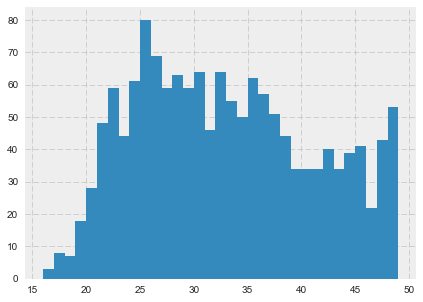

In [14]:
age_range = df.wife_age.max() - df.wife_age.min()

df.wife_age.hist(bins=age_range,figsize=(7,5))
plt.plot()

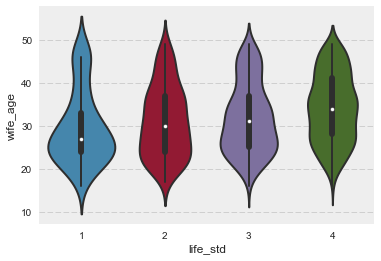

In [15]:
sb.violinplot(x='life_std',y='wife_age',data=df)

In [16]:
for c in list(df.columns)[1:]:
    print('--{} variables:\n'.format(c))
    print(df[c].value_counts(),'\n')

--wife_edu variables:

4    577
3    410
2    334
1    152
Name: wife_edu, dtype: int64 

--husb_edu variables:

4    899
3    352
2    178
1     44
Name: husb_edu, dtype: int64 

--num_child variables:

2     276
1     276
3     259
4     197
5     135
0      97
6      92
7      49
8      47
9      16
11     11
10     11
12      4
13      2
16      1
Name: num_child, dtype: int64 

--wife_islam variables:

1    1253
0     220
Name: wife_islam, dtype: int64 

--wife_unemployed variables:

1    1104
0     369
Name: wife_unemployed, dtype: int64 

--husb_occupation variables:

3    585
1    436
2    425
4     27
Name: husb_occupation, dtype: int64 

--life_std variables:

4    684
3    431
2    229
1    129
Name: life_std, dtype: int64 

--bad_media variables:

0    1364
1     109
Name: bad_media, dtype: int64 

--contra_type variables:

1    629
3    511
2    333
Name: contra_type, dtype: int64 



#### Binning the # children and age to prep for one-hot encoding

In [17]:
df['num_children'] = pd.cut(df['num_child'],[-1,1,3,6,max(df['num_child'])],labels=['[0-1]','(1-3]','(3-6]','(6-{}]'.format(max(df['num_child']))])

In [18]:
df['num_children'].value_counts()

(1-3]     535
(3-6]     424
[0-1]     373
(6-16]    141
Name: num_children, dtype: int64

In [19]:
df['wife_range'] = pd.cut(df['wife_age'].astype('int64'),bins=[0,24,30,37,43,max(df['wife_age'])],labels=['[18-24]','(24-29]','(29-37]','(37-43]','(43-{}]'.format(max(df['wife_age']))])

In [20]:
df['wife_range'].value_counts()

(24-29]    394
(29-37]    385
[18-24]    276
(37-43]    220
(43-49]    198
Name: wife_range, dtype: int64

In [21]:
df_2 = pd.crosstab(df['wife_range'],df['num_children'],normalize='index')
df_2

num_children,[0-1],(1-3],(3-6],(6-16]
wife_range,,,,
[18-24],0.601449,0.355072,0.043478,0.000000
(24-29],0.314721,0.467005,0.200508,0.017766
(29-37],0.088312,0.394805,0.428571,0.088312
(37-43],0.100000,0.286364,0.422727,0.190909
(43-49],0.136364,0.191919,0.378788,0.292929


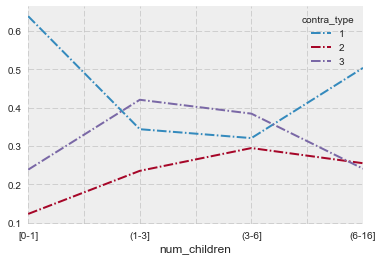

In [22]:
df_3 = pd.crosstab(df['num_children'],df['contra_type'],normalize='index')
df_3.plot(marker='d',markerfacecolor='none',linestyle='-.')

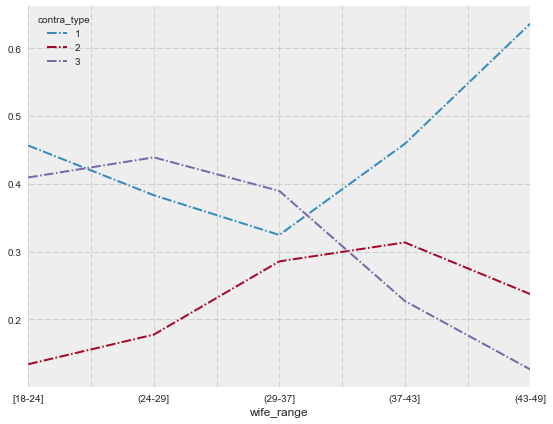

In [23]:
df_4 = pd.crosstab(df['wife_range'],df['contra_type'],normalize='index')
df_4.plot(marker='d',markerfacecolor='none',linestyle='-.',figsize=(9,7))

- Normalized the frequency counts due to the discrepancy in population. When looking at raw totals, it appears as though contraceptive type 1 decreases with age, but the proportion of women using no contraception actually appears to increase after around age 37.

In [24]:
df.drop(['wife_age','num_child'],axis=1,inplace=True)

In [25]:
for c in ['wife_edu','husb_edu','husb_occupation','life_std','contra_type']:
    df[c] = df[c].astype('category')

In [26]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,wife_islam,wife_unemployed,bad_media,wife_edu_1,wife_edu_2,wife_edu_3,wife_edu_4,husb_edu_1,husb_edu_2,husb_edu_3,...,contra_type_3,num_children_[0-1],num_children_(1-3],num_children_(3-6],num_children_(6-16],wife_range_[18-24],wife_range_(24-29],wife_range_(29-37],wife_range_(37-43],wife_range_(43-49]
0,1,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [27]:
def sigmoid(array):
    sig = 1 + (1 - np.exp(-array))
    return sig

In [28]:
def reorder_df(df,list_of_targets=None):
    #quick function to change column order in dataframe
    
    if list_of_targets is None:
        list_of_targets = ['contra_type_1','contra_type_2','contra_type_3']

    columns = list(df.columns)
    
    for i in list_of_targets:
        columns.pop(columns.index(i))
        columns.append(i)

    df = df.loc[:,columns]
    return df


In [29]:
df_dummies = reorder_df(df_dummies)

In [30]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 31 columns):
wife_islam             1473 non-null int64
wife_unemployed        1473 non-null int64
bad_media              1473 non-null int64
wife_edu_1             1473 non-null uint8
wife_edu_2             1473 non-null uint8
wife_edu_3             1473 non-null uint8
wife_edu_4             1473 non-null uint8
husb_edu_1             1473 non-null uint8
husb_edu_2             1473 non-null uint8
husb_edu_3             1473 non-null uint8
husb_edu_4             1473 non-null uint8
husb_occupation_1      1473 non-null uint8
husb_occupation_2      1473 non-null uint8
husb_occupation_3      1473 non-null uint8
husb_occupation_4      1473 non-null uint8
life_std_1             1473 non-null uint8
life_std_2             1473 non-null uint8
life_std_3             1473 non-null uint8
life_std_4             1473 non-null uint8
num_children_[0-1]     1473 non-null uint8
num_children_(1-3]     1473 non-n

In [31]:
df_features = df_dummies.iloc[:,:-3]
df_targets = df_dummies.iloc[:,-3:]

In [32]:
features_matrix = df_features.as_matrix()
targets_matrix = df_targets.as_matrix()

In [33]:
weights = np.zeros(features_matrix.shape[1])

In [34]:
predictions = sigmoid(np.dot(features_matrix,weights))

In [35]:
sum(np.round(predictions)==targets_matrix[:,0])/len(targets_matrix[:,0])

0.4270196877121521

In [36]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [37]:
weights_gradient = np.dot(features_matrix.T,(predictions-targets_matrix[:,0]))
weights_gradient

array([699., 645.,  35.,  49., 158., 235., 402.,  13.,  79., 191., 561.,
       278., 225., 327.,  14.,  49., 112., 247., 436., 135., 351., 288.,
        70., 150., 243., 260., 119.,  72.])

In [38]:
weights_gradient = weights_gradient / features_matrix.shape[0]
weights_gradient

array([0.47454175, 0.43788187, 0.02376103, 0.03326544, 0.10726409,
       0.15953836, 0.27291242, 0.00882553, 0.05363204, 0.12966735,
       0.3808554 , 0.18873048, 0.15274949, 0.22199593, 0.00950441,
       0.03326544, 0.0760353 , 0.167685  , 0.29599457, 0.09164969,
       0.23828921, 0.19551935, 0.04752206, 0.10183299, 0.16496945,
       0.17651052, 0.08078751, 0.04887984])

In [39]:
weights = weights - (weights_gradient*0.05)
weights

array([-0.02372709, -0.02189409, -0.00118805, -0.00166327, -0.0053632 ,
       -0.00797692, -0.01364562, -0.00044128, -0.0026816 , -0.00648337,
       -0.01904277, -0.00943652, -0.00763747, -0.0110998 , -0.00047522,
       -0.00166327, -0.00380177, -0.00838425, -0.01479973, -0.00458248,
       -0.01191446, -0.00977597, -0.0023761 , -0.00509165, -0.00824847,
       -0.00882553, -0.00403938, -0.00244399])

In [40]:
gradient_df = pd.DataFrame()

In [41]:
def log_loss(predictions,actual,eps=1e-15):
    '''take an array of prediction probabilities (clipped to avoid undefined values) and measures accuracy while
    also factoring for confidence'''
    #assert (max(predictions)<=1 and min(predictions)>=0), 'Please make sure to use predict_proba'
    
    preds_clipped = np.clip(predictions,eps,1-eps)
    
    loss = -1 * np.mean((actual * np.log(preds_clipped)) + ((1-actual) * np.log(1-preds_clipped)))
    
    return loss

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score

## Testing Gradient Descent ##
### Target Variable: Contraceptive Type 1 (No Contraceptive)

- Keep in mind, this is not a final prediction
- No train/test split, just to peek at which factors have greatest influence on classification

In [43]:
weights = np.zeros(features_matrix.shape[1])
targets = targets_matrix[:,0]

row_list = []

for i in range(1000):
    prediction_proba = sigmoid(np.dot(features_matrix,weights))
    
    weights_gradient = np.dot(features_matrix.T,(prediction_proba-targets)) / features_matrix.shape[0]
    
    weights = weights - (weights_gradient*0.1)
    
    predictions = np.round(prediction_proba)
    
    row_list.append([*weights,roc_auc_score(targets,prediction_proba),log_loss(prediction_proba,targets),accuracy_score(targets,predictions)])
    
    if i % 100 == 0:
        print(round(sum(predictions==targets)/len(targets_matrix[:,0]),5))
        
    ##early stopping: if AUC does not improve/change more than 0.1% between 50 loops, then loop is broken
        
    if i > 50:
        if abs((row_list[i][-3] - row_list[i-50][-3]) / row_list[i][-3]) < 0.001:
            break
        
gradient_df = pd.DataFrame(row_list)
    
    

0.42702
0.70604
0.70876


In [44]:
columns_list = list(df_features.columns)
columns_list.extend(('auc_score','log_loss','accuracy_score'))

In [45]:
top_auc_score = gradient_df.loc[:,28].idxmax(axis=1)

In [46]:
best_weights_for_loss= [(x,y) for x,y in zip(gradient_df.iloc[top_auc_score,].values,columns_list)]
#best_weights_for_loss_sorted = best_weights_for_loss.sort(key = lambda x: x[0],reverse=True)

In [47]:
best_weights_for_loss

[(0.01734052509903236, 'wife_islam'),
 (-0.03157000814238022, 'wife_unemployed'),
 (0.06021613569202414, 'bad_media'),
 (0.02514188591749788, 'wife_edu_1'),
 (-0.016920187754025994, 'wife_edu_2'),
 (-0.08039322291921872, 'wife_edu_3'),
 (-0.17816954618826544, 'wife_edu_4'),
 (-0.013733505908808164, 'husb_edu_1'),
 (-0.08209863162264787, 'husb_edu_2'),
 (-0.08975843883174915, 'husb_edu_3'),
 (-0.06475049458080707, 'husb_edu_4'),
 (-0.06103980398812278, 'husb_occupation_1'),
 (-0.04948732418041897, 'husb_occupation_2'),
 (-0.07621561772345252, 'husb_occupation_3'),
 (-0.06359832505201797, 'husb_occupation_4'),
 (-0.0057047666113501615, 'life_std_1'),
 (-0.05480775191130269, 'life_std_2'),
 (-0.08186799926011788, 'life_std_3'),
 (-0.10796055316124147, 'life_std_4'),
 (0.12339809841809322, 'num_children_[0-1]'),
 (-0.08515551932185005, 'num_children_(1-3]'),
 (-0.15989638142582693, 'num_children_(3-6]'),
 (-0.12868726861442864, 'num_children_(6-16]'),
 (-0.14871104445635577, 'wife_range_[1

In [48]:
best_weights_for_loss_sorted = sorted(best_weights_for_loss,key= lambda x: x[0],reverse=True)

### Sanity Checks###

** Positive contributing factors to non-use of contraception: **

In [49]:
best_weights_for_loss_sorted[3:8]

[(0.12339809841809322, 'num_children_[0-1]'),
 (0.092059770648329, 'wife_range_(43-49]'),
 (0.06021613569202414, 'bad_media'),
 (0.02514188591749788, 'wife_edu_1'),
 (0.01734052509903236, 'wife_islam')]

** Negative contributing factors to non-use of contraception: **

In [50]:
best_weights_for_loss_sorted[-5:]

[(-0.12172564522878283, 'wife_range_(24-29]'),
 (-0.12868726861442864, 'num_children_(6-16]'),
 (-0.14871104445635577, 'wife_range_[18-24]'),
 (-0.15989638142582693, 'num_children_(3-6]'),
 (-0.17816954618826544, 'wife_edu_4')]

In [51]:
from sklearn.naive_bayes import BernoulliNB

In [52]:
bern = BernoulliNB(alpha=0.1)

In [53]:
bern.fit(features_matrix,targets_matrix[:,0])

BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)

In [54]:
sum(bern.predict(features_matrix) == targets_matrix[:,0]) / len(targets_matrix[:,0])

0.6524100475220638

- Is my homemade function/ for-loop outperforming out of the box Bernoulli NB??

### Optimize with regularization? ##

- Going to try two methods and see their effect on predictions:
    1. L-1 (RIDGE): Add weights' Sum of Squares multiplied by a lambda constant to avoid over-fitting
    2. L-2 (LASSO): Add weights' Sum of Absolute Values multiplied by lambda constant, which reduces less important factors to zero (feature selection)

### Ridge Regression

In [55]:
weights = np.zeros(features_matrix.shape[1])
targets = targets_matrix[:,0]

epsilon = 50

row_list = []

for i in range(1000):
    prediction_proba = sigmoid(np.dot(features_matrix,weights))
    
    weights_gradient = (np.dot(features_matrix.T,(prediction_proba-targets)) / features_matrix.shape[0]) + ((epsilon/(2*len(targets))) * np.sum(np.square(weights)))
    
    weights = weights - (weights_gradient*0.1) 
    
    #print(weights)
    
    predictions = np.round(prediction_proba)
    
    row_list.append([*weights,roc_auc_score(targets,prediction_proba),log_loss(prediction_proba,targets),accuracy_score(targets,predictions)])
    
    if i % 100 == 0:
        print(round(sum(predictions==targets)/len(targets_matrix[:,0]),5))
        
    ##early stopping: if AUC does not improve/change more than 0.1% between 50 loops, then loop is broken
        
    if i > 50:
        if abs((row_list[i][-3] - row_list[i-50][-3]) / row_list[i][-3]) < 0.001:
            break
        
gradient_df_ridge = pd.DataFrame(row_list)

0.42702
0.7074


In [56]:
top_auc_score_ridge = gradient_df_ridge.loc[:,28].idxmax(axis=1)

In [57]:
top_auc_score_ridge

196

In [58]:
best_weights_for_loss_ridge= [(x,y) for x,y in zip(gradient_df_ridge.iloc[top_auc_score_ridge,].values,columns_list)]
#best_weights_for_loss_ridge_sorted = best_weights_for_loss_ridge.sort(key = lambda x: x[0],reverse=True)

In [59]:
best_weights_for_loss_ridge_sorted = sorted(best_weights_for_loss_ridge,key= lambda x: x[0],reverse=True)

In [60]:
best_weights_for_loss_sorted[:5]

[(0.7527181488709228, 'auc_score'),
 (0.7094365241004752, 'accuracy_score'),
 (0.6698729880911976, 'log_loss'),
 (0.12339809841809322, 'num_children_[0-1]'),
 (0.092059770648329, 'wife_range_(43-49]')]

In [61]:
best_weights_for_loss_ridge_sorted[:5]

[(0.7529950496914534, 'auc_score'),
 (0.7053632043448744, 'accuracy_score'),
 (0.6281368308292199, 'log_loss'),
 (0.11036292506797032, 'num_children_[0-1]'),
 (0.06959286566400237, 'wife_range_(43-49]')]

In [62]:
for l, r in zip(best_weights_for_loss_sorted,best_weights_for_loss_ridge_sorted):
    print(round(l[0],4),round(r[0],4),l[1])

0.7527 0.753 auc_score
0.7094 0.7054 accuracy_score
0.6699 0.6281 log_loss
0.1234 0.1104 num_children_[0-1]
0.0921 0.0696 wife_range_(43-49]
0.0602 0.0433 bad_media
0.0251 0.0411 wife_edu_1
0.0173 0.0135 wife_islam
0.0063 -0.0145 wife_range_(37-43]
-0.0057 -0.0168 life_std_1
-0.0137 -0.0234 husb_edu_1
-0.0169 -0.0262 wife_edu_2
-0.0316 -0.0427 wife_unemployed
-0.0495 -0.0496 husb_occupation_2
-0.0548 -0.0614 life_std_2
-0.061 -0.0641 husb_occupation_1
-0.0636 -0.0682 husb_occupation_4
-0.0648 -0.0754 husb_edu_4
-0.0762 -0.0882 husb_occupation_3
-0.0783 -0.0888 wife_range_(29-37]
-0.0804 -0.0894 wife_edu_3
-0.0819 -0.0923 life_std_3
-0.0821 -0.0927 husb_edu_2
-0.0852 -0.0929 num_children_(1-3]
-0.0898 -0.0931 husb_edu_3
-0.108 -0.1091 life_std_4
-0.1217 -0.1359 wife_range_(24-29]
-0.1287 -0.137 num_children_(6-16]
-0.1487 -0.163 wife_range_[18-24]
-0.1599 -0.1659 num_children_(3-6]
-0.1782 -0.1834 wife_edu_4


- Ridge, at least with an epsilon of 50, performs slightly better

In [63]:
l1 = [n for n, v in best_weights_for_loss]
l2 = [n for n, v in best_weights_for_loss_ridge]

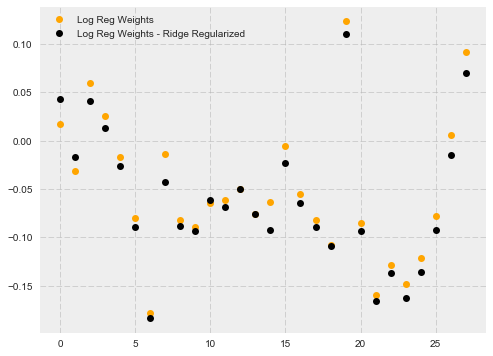

In [64]:
plt.figure(figsize=(8,6))

plt.plot(l1[:-3],marker='o',linestyle='none',color='orange',label='Log Reg Weights')
plt.plot(l2[:-3],marker='o',linestyle='none',color='black',label='Log Reg Weights - Ridge Regularized')
plt.legend(loc=0)
plt.show()
#plt.plot(l1[3:],l2[3:])

### LASSO Regression

In [65]:
weights = np.zeros(features_matrix.shape[1])
targets = targets_matrix[:,0]

epsilon = 5

row_list = []

for i in range(1000):
    prediction_proba = sigmoid(np.dot(features_matrix,weights))
    
    weights_gradient = (np.dot(features_matrix.T,(prediction_proba-targets)) / features_matrix.shape[0]) + ((epsilon/(2*len(targets))) * np.sum(np.abs(weights)))
    
    weights = weights - (weights_gradient*0.1) 
    
    #print(weights)
    
    predictions = np.round(prediction_proba)
    
    row_list.append([*weights,roc_auc_score(targets,prediction_proba),log_loss(prediction_proba,targets),accuracy_score(targets,predictions)])
    
    if i % 100 == 0:
        print(round(sum(predictions==targets)/len(targets_matrix[:,0]),5))
        
    ##early stopping: if AUC does not improve/change more than 0.1% between 50 loops, then loop is broken
        
    if i > 50:
        if abs((row_list[i][-3] - row_list[i-50][-3]) / row_list[i][-3]) < 0.001:
            break
        
gradient_df_lasso = pd.DataFrame(row_list)

0.42702
0.70604


In [66]:
top_auc_score_lasso = gradient_df_lasso.loc[:,28].idxmax(axis=1)
top_auc_score_lasso

190

In [67]:
best_weights_for_loss_lasso= [(x,y) for x,y in zip(gradient_df_lasso.iloc[top_auc_score_lasso,].values,columns_list)]

In [68]:
best_weights_for_loss_lasso[-5:]

[(-0.016018952461920293, 'wife_range_(37-43]'),
 (0.06787504240724915, 'wife_range_(43-49]'),
 (0.7529536087523263, 'auc_score'),
 (0.6277300799606846, 'log_loss'),
 (0.7046843177189409, 'accuracy_score')]

In [69]:
l1 = [n for n, v in best_weights_for_loss]
l2 = [n for n, v in best_weights_for_loss_lasso]

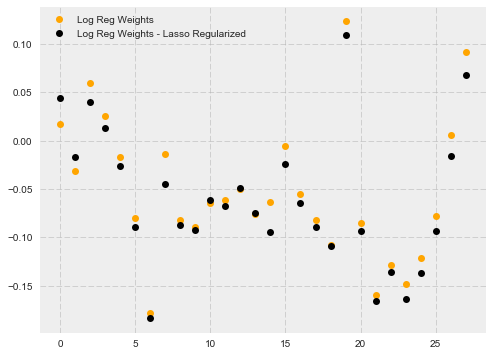

In [70]:
plt.figure(figsize=(8,6))

plt.plot(l1[:-3],marker='o',linestyle='none',color='orange',label='Log Reg Weights')
plt.plot(l2[:-3],marker='o',linestyle='none',color='black',label='Log Reg Weights - Lasso Regularized')
plt.legend(loc=0)
plt.show()
#plt.plot(l1[3:],l2[3:])

In [71]:
gradient_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.047454,-0.043788,-0.002376,-0.003327,-0.010726,-0.015954,-0.027291,-0.000883,-0.005363,-0.012967,...,-0.019552,-0.004752,-0.010183,-0.016497,-0.017651,-0.008079,-0.004888,0.500000,19.790497,0.427020
1,-0.076865,-0.071129,-0.003463,-0.004917,-0.017153,-0.026201,-0.045678,-0.001314,-0.008695,-0.021523,...,-0.033072,-0.007782,-0.016516,-0.027296,-0.029763,-0.013183,-0.007191,0.626550,0.987762,0.427020
2,-0.092815,-0.086147,-0.003623,-0.005269,-0.020439,-0.032216,-0.057294,-0.001429,-0.010575,-0.026860,...,-0.042054,-0.009565,-0.020021,-0.033837,-0.037683,-0.016074,-0.007601,0.631264,0.754544,0.441276
3,-0.100294,-0.093387,-0.003221,-0.004876,-0.021787,-0.035575,-0.064553,-0.001355,-0.011575,-0.030196,...,-0.048127,-0.010585,-0.021791,-0.037693,-0.042896,-0.017567,-0.006845,0.636621,0.682966,0.569586
4,-0.103088,-0.096313,-0.002523,-0.004093,-0.022090,-0.037465,-0.069322,-0.001185,-0.012113,-0.032428,...,-0.052530,-0.011198,-0.022641,-0.040054,-0.046536,-0.018275,-0.005464,0.642856,0.659866,0.617108


In [72]:
weights_history = gradient_df.iloc[:,:-3]
scores_history = gradient_df.iloc[:,-3:]

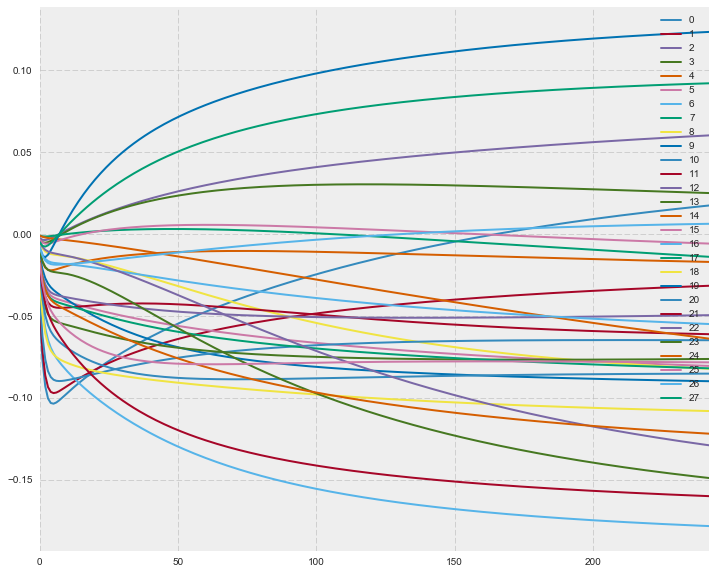

In [77]:
weights_history.plot(figsize=(12,10))

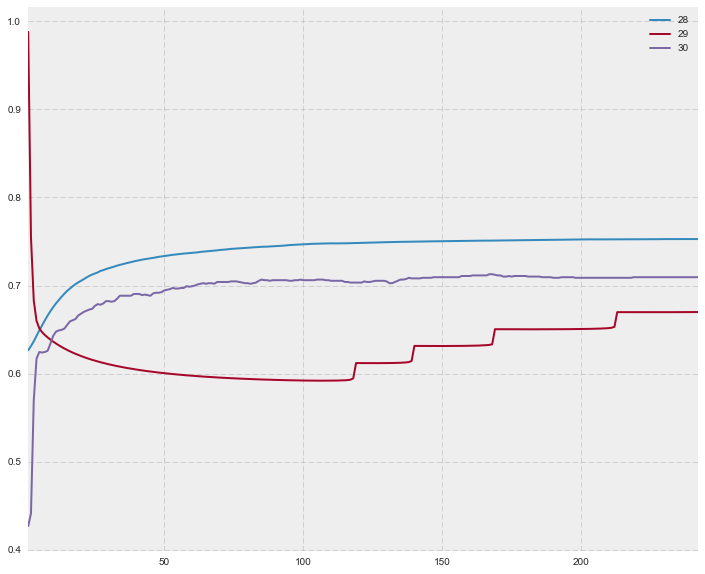

In [79]:
scores_history.iloc[1:,:].plot(figsize=(12,10))

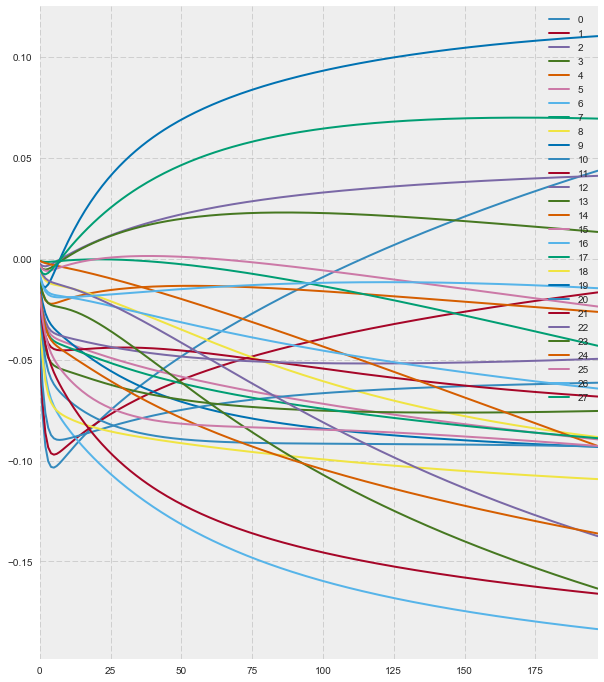

In [80]:
weights_history_ridge = gradient_df_ridge.iloc[:,:-3]
weights_history_ridge.plot(figsize=(10,12))
plt.show()

In [ ]:
def fit(features_matrix, targets_matrix,pandas=False):
    
    if pandas:
        
        features_header, targets_header = features_matrix.columns,targets_matrix.columns
        
        features_matrix, targets_matrix = features_matrix.values, targets_matrix.values

    weights = np.zeros(features_matrix.shape[1])
    targets = targets_matrix[:,0]
    
    gradients = []
    
    for c in range(targets_matrix.shape[1]):
        
        targets = targets_matrix[:,c]

        weights_list = []
        scores_list = []

        for i in range(1000):
            prediction_proba = sigmoid(np.dot(features_matrix,weights))
    
            weights_gradient = np.dot(features_matrix.T,(prediction_proba-targets)) / features_matrix.shape[0]
            
            weights = weights - (weights_gradient*0.1)
        
            prediction_proba = sigmoid(np.dot(features_matrix,weights))
    
            predictions = np.round(prediction_proba)
    
            weights_list.append([*weights])
 
            scores_list.append([roc_auc_score(targets,prediction_proba),log_loss(prediction_proba,targets),accuracy_score(targets,predictions)])

            #if i % 100 == 0:
            #print(round(sum(predictions==targets)/len(targets_matrix[:,0]),5))
        
        ##early stopping: if AUC does not improve/change more than 0.1% between 50 loops, then loop is broken
        
            if i > 50:
                if abs((scores_list[i][-3] - scores_list[i-50][-3]) / scores_list[i][-3]) < 0.001:
                    break
                    
        gradients.append(weights_list[-1:,:])
        
        gradient_dfs = pd.DataFrame(row_list[])